# KKBox Dataset Processing

[Kaggle Link](https://www.kaggle.com/competitions/kkbox-music-recommendation-challenge/overview)

[Notion Link](https://www.notion.so/yi-ting/W1-Spike-Datasets-7f37af801dbf4e61a489d2a1999f31d6?v=232b838b9a994d9b858082551eca57fb)

## Task
Predict True/False will the user listen to the same song repetitively in a month, after the first listen. 

- song_extra_info.csv
- train.csv
- songs.csv
- sample_submission.csv
- test.csv -> Don't use this dataset

In [6]:
import pandas as pd
import seaborn as sns
import libs.data as data

In [55]:
# Get data frame collection.
kk = data.DataFrameCollection(
    name="kkbox",
    state="raw",
)

reading DataFrames from /home/xexanoth/Graduated/Experiments/datasets/kkbox/raw/pkl


## Merge all csv

In [3]:
def merge_all_csv():
    # train <-join- songs
    train_songs = pd.merge(
        left=kk.train,
        right=kk.songs,
        on="song_id", # song id
        how='left'
    )

    train_songs_extra = pd.merge(
        left=train_songs,
        right=kk.songs_extra,
        on='song_id', # song id
        how='left'
    )

    merged = pd.merge(
        left=train_songs_extra,
        right=kk.members,
        on='msno',  # user id
        how='left',
    )
    return merged

## Fill missing values

### categorical

In [76]:
def train_fillna():
    kk.train.source_system_tab.fillna('[UNK]', inplace=True)
    kk.train.source_screen_name.fillna('[UNK]', inplace=True)
    kk.train.source_type.fillna('[UNK]', inplace=True)

def members_fillna():
    kk.members.gender.fillna('[UNK]', inplace=True)

def songs_fillna():
    kk.songs.genre_ids.fillna('[UNK]', inplace=True)
    kk.songs.composer.fillna('[UNK]', inplace=True)
    kk.songs.lyricist.fillna('[UNK]', inplace=True)
    kk.songs.language.fillna(kk.songs.language.mode(), inplace=True)

0    52.0
Name: language, dtype: float64

In [8]:
kk.merged.sort_values(by="msno", inplace=True, kind='stable')

In [10]:
lu = kk.merged[kk.merged.msno == "zzzRi5ek1YCKTGns8C77xwAutE05PAPmz8T/pIIQhzE="]
fu = kk.merged[kk.merged.msno == "++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU="]


<AxesSubplot:>

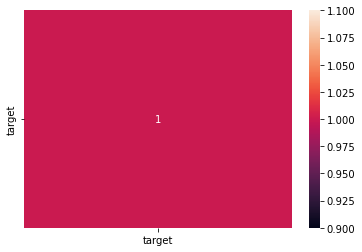

In [13]:
lu

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
3152063,zzzRi5ek1YCKTGns8C77xwAutE05PAPmz8T/pIIQhzE=,rqNd52MxQ+okfR61j2c7u36DLODO4d2Zt/hMm3jxncM=,my library,Album more,album,1,222624.0,458,三個人 (Three People),倪子岡\劉軒蓁,劉軒蓁,3.0,這是我 (This is me),TWAG11600701,1,0,NaN,4,20161105,20170614
4074747,zzzRi5ek1YCKTGns8C77xwAutE05PAPmz8T/pIIQhzE=,wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=,my library,Search,song,1,265508.0,465,田馥甄 (Hebe),JerryC,徐世珍/吳輝福,3.0,小幸運 (A little happiness),TWD951562101,1,0,NaN,4,20161105,20170614
4077875,zzzRi5ek1YCKTGns8C77xwAutE05PAPmz8T/pIIQhzE=,PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=,my library,Search Trends,song,0,227343.0,465,謝和弦 (R-chord),R-chord,R-chord,3.0,謝謝妳愛我 (Thanks For Your Love),TWA531657203,1,0,NaN,4,20161105,20170614


## Data Analysis

In [2]:
# Load all datasets
kk = get_data.KKBoxDataset("./datasets/kkbox/")

In [3]:
s_s_id = kk.songs.song_id
se_s_id = kk.songs_extra.song_id

len(set(se_s_id).intersection(set(s_s_id)))

2295422

In [49]:
train = kkbox.train
i_train = info.Info(train)

In [52]:
len(train.msno.unique())

30755

In [34]:
members = pd.read_csv('./datasets/members.csv')

In [ ]:
i_members = info.Info(members)

i_members.show_unique_info()
i_members.show_nan_info()
_ = members.hist(figsize=(12, 12))

plt.hist(members.bd[members.bd < 65])